In [34]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('data.csv')
data.head()

,title_words,days_passed,ct_image,ct_tags,ct_words,title_emot_quotient,featured_in_tds,read_time,claps,img/word
0,6.0,1.0,8.0,5.0,2493.0,0.000,True,11.0,683.0,0.003209
1,10.0,1.0,7.0,5.0,2301.0,0.874,True,11.0,696.0,0.003042
2,5.0,2.0,4.0,5.0,547.0,0.000,True,3.0,496.0,0.007313
3,8.0,2.0,2.0,5.0,661.0,0.250,True,3.0,2700.0,0.003026
4,4.0,0.0,5.0,5.0,499.0,0.000,False,3.0,8.0,0.010020


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 10 columns):
title_words            635 non-null float64
days_passed            635 non-null float64
ct_image               635 non-null float64
ct_tags                635 non-null float64
ct_words               635 non-null float64
title_emot_quotient    635 non-null float64
featured_in_tds        635 non-null bool
read_time              635 non-null float64
claps                  635 non-null float64
img/word               635 non-null float64
dtypes: bool(1), float64(9)
memory usage: 45.3 KB


In [4]:
data.max(), data.min()

(title_words               16.000000
 days_passed              835.000000
 ct_image                  35.000000
 ct_tags                    5.000000
 ct_words                6753.000000
 title_emot_quotient        0.874000
 featured_in_tds            1.000000
 read_time                 27.000000
 claps                  22000.000000
 img/word                   0.075342
 dtype: float64, title_words             2.0
 days_passed             0.0
 ct_image                0.0
 ct_tags                 0.0
 ct_words               16.0
 title_emot_quotient     0.0
 featured_in_tds         0.0
 read_time               2.0
 claps                   2.0
 img/word                0.0
 dtype: float64)

In [5]:
data.isnull().sum()

title_words            0
days_passed            0
ct_image               0
ct_tags                0
ct_words               0
title_emot_quotient    0
featured_in_tds        0
read_time              0
claps                  0
img/word               0
dtype: int64

In [61]:
data.claps.min(), data.claps.max()

(2.0, 22000.0)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [89]:
data['new_claps'] = data.claps.rank(method='dense').astype(int)
data.head()

,title_words,days_passed,ct_image,ct_tags,ct_words,title_emot_quotient,featured_in_tds,read_time,claps,img/word,new_claps
0,6.0,1.0,8.0,5.0,2493.0,0.000,True,11.0,683.0,0.003209,302
1,10.0,1.0,7.0,5.0,2301.0,0.874,True,11.0,696.0,0.003042,304
2,5.0,2.0,4.0,5.0,547.0,0.000,True,3.0,496.0,0.007313,249
3,8.0,2.0,2.0,5.0,661.0,0.250,True,3.0,2700.0,0.003026,372
4,4.0,0.0,5.0,5.0,499.0,0.000,False,3.0,8.0,0.010020,2


In [91]:
data.new_claps.nunique()

394

In [75]:
y = data['new_claps']
X = data.drop(['claps', 'new_claps'], axis = 1)

KeyError: 'new_claps'

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)

In [8]:
X_train.shape, X_val.shape

((508, 9), (127, 9))

In [10]:
def rmse(actual, pred):
    print(math.sqrt(sum(np.square(np.subtract(actual, pred)))/len(actual)))

In [11]:
rf = RandomForestClassifier()

In [12]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
val_pred = rf.predict(X_val)
rmse(y_val, val_pred)

1710.1984459148152


In [38]:
grid = {'min_samples_leaf' : [3,5], 'max_features' : ['auto', 'log2', 'sqrt']
       }
clf = GridSearchCV(rf, grid, cv=5)
clf.fit(X_train, y_train)
clf.best_estimator_

In [50]:
rf = RandomForestClassifier(min_samples_leaf=1, max_features='auto', n_estimators=10, random_state=10)

rf.fit(X_train, y_train)
val_pred = rf.predict(X_val)
rmse(y_val, val_pred)

1604.254805295892


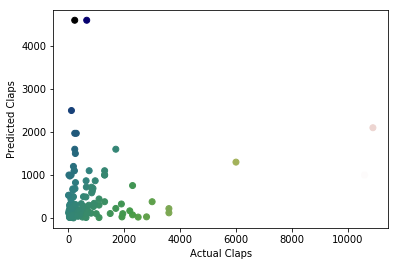

In [51]:
plt.scatter(y_val, val_pred, c=np.subtract(y_val, val_pred), cmap=plt.cm.gist_earth)
plt.ylabel('Predicted Claps')
plt.xlabel('Actual Claps')
plt.show()

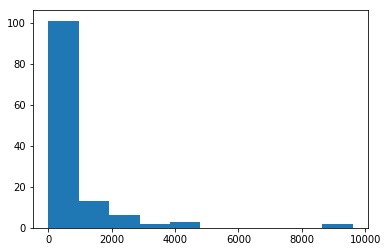

In [54]:
plt.hist(abs(np.subtract(y_val, val_pred)))

plt.show()

In [53]:
np.subtract(y_val, val_pred).value_counts()

 114.0     2
-315.0     2
 300.0     2
 3381.0    1
 140.0     1
-144.0     1
 1396.0    1
 303.0     1
 200.0     1
-79.0      1
-1684.0    1
-27.0      1
 23.0      1
-32.0      1
 219.0     1
-193.0     1
 18.0      1
-209.0     1
 95.0      1
 118.0     1
-3.0       1
 548.0     1
 58.0      1
-443.0     1
-130.0     1
 315.0     1
-45.0      1
 141.0     1
 162.0     1
-890.0     1
          ..
-353.0     1
 53.0      1
 89.0      1
 150.0     1
-1369.0    1
 2773.0    1
-21.0      1
-11.0      1
 63.0      1
 100.0     1
 235.0     1
 195.0     1
 35.0      1
 68.0      1
 93.0      1
 135.0     1
-7.0       1
 311.0     1
-53.0      1
 299.0     1
-12.0      1
 14.0      1
 146.0     1
-252.0     1
 198.0     1
-343.0     1
 439.0     1
-148.0     1
 123.0     1
 4700.0    1
Name: claps, Length: 124, dtype: int64

In [55]:
fi = pd.DataFrame(rf.feature_importances_, X_train.columns)
fi.sort_values(by = 0, ascending=False)

,0
ct_words,0.184270
img/word,0.172900
days_passed,0.170111
title_words,0.122129
ct_image,0.119204
read_time,0.104686
title_emot_quotient,0.068305
ct_tags,0.045121
featured_in_tds,0.013272
